# Feature Engineering
Till now we had numerical data in a tidy, `[n_samples, n_features]` format. In the real world, data rarely comes in such a form. With this in mind, one of the more important steps in using machine learning in practice is feature engineering—that is, taking whatever information you have about your problem and turning it into numbers that you can use to build your feature matrix.

we will cover a few common examples of feature engineering tasks:

* features for representing categorical data,  
* features for representing text, and
* features for representing images. 


Additionally, we will discuss _derived features_ for increasing model complexity and _imputation of missing data_. Often this process is known as **vectorization**, as it involves converting arbitrary data into well-behaved vectors.

## Categorical Features
One common type of non-numerical data is categorical data.

In [1]:
data = [
{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
{'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
{'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
{'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]
data

[{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
 {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
 {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
 {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}]

**Simply we can encode this data with a straightforward numerical mapping**
`{'Queen Anne':1, 'Fremnt':2,'Wallingford':3}`

It turns out that this is not generally a useful approach in Scikit-Learn: the package’s models make the fundamental assumption that numerical features reflect algebraic
quantities. Thus such a mapping would imply, for example, that _Queen Anne < Fre‐
mont < Wallingford, or even that Wallingford - Queen Anne = Fremont_, which (niche demographic jokes aside) does not make much sense.

**In this case, one proven technique is to use one-hot encoding, which effectively creates
extra columns indicating the presence or absence of a category with a value of 1 or 0,
respectively. When your data comes as a list of dictionaries, Scikit-Learn’s `DictVectorizer` will do this for you:**


In [3]:
from sklearn.feature_extraction import DictVectorizer
vec=DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

Notice that the neighborhood column has been expanded into three separate columns,
representing the three neighborhood labels, and that each row has a 1 in the column
associated with its neighborhood. With these categorical features thus encoded, you
can proceed as normal with fitting a Scikit-Learn model.

In [4]:
vec.get_feature_names()

/home/qalmaqihir/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

**There is one clear disadvantage of this approach: if your category has many possible
values, this can greatly increase the size of your dataset.** However, because the encoded data contains mostly zeros, a sparse output can be a very efficient solution:

In [5]:
vec=DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

Many (though not yet all) of the Scikit-Learn estimators accept such sparse inputs
when fitting and evaluating models. `sklearn.preprocessing.OneHotEncoder` and
`sklearn.feature_extraction.FeatureHasher` are two additional tools that Scikit-Learn includes to support this type of encoding.

## Text Features
Another common need in feature engineering is to convert text to a set of representa‐
tive numerical values. For example, most automatic mining of social media data relies
on some form of encoding the text as numbers. One of the simplest methods of
encoding data is by word counts: you take each snippet of text, count the occurrences
of each word within it, and put the results in a table.

In [6]:
sample = ['problem of evil',
'evil queen',
'horizon problem']

For a vectorization of this data based on word count, we could construct a column
representing the word “problem,” the word “evil,” the word “horizon,” and so on.
While doing this by hand would be possible, we can avoid the tedium by using Scikit-
Learn’s CountVectorizer:

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
X= vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

The result is a sparse matrix recording the number of times each word appears; it is easier to inspect if we convert this to a DataFrame with labeled columns:

In [8]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

/home/qalmaqihir/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


There are some issues with this approach, however: the raw word counts lead to features that put too much weight on words that appear very frequently, and this can be
suboptimal in some classification algorithms. One approach to fix this is known as term **frequency–inverse document frequency (TF–IDF)**, which weights the word counts
by a measure of how often they appear in the documents. The syntax for computing
these features is similar to the previous example:

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
X=vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

/home/qalmaqihir/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


## Image Features
Another common need is to suitably encode images for machine learning analysis. The simplest approach is what we used for the digits data in “Introducing Scikit-
Learn”: simply using the pixel values themselves. But depending on the application, such approaches may not be optimal.

A comprehensive summary of feature extraction techniques for images is well beyond
the scope of this section, but you can find excellent implementations of many of the
standard approaches in the **Scikit-Image project**.

## Derived Features
Another useful type of feature is one that is mathematically derived from some input
features. We saw an example of this in “Hyperparameters and Model Validation” when we constructed polynomial features from our input data. We saw that
we could convert a linear regression into a polynomial regression not by changing the
model, but by transforming the input! This is sometimes known as basis function
regression,

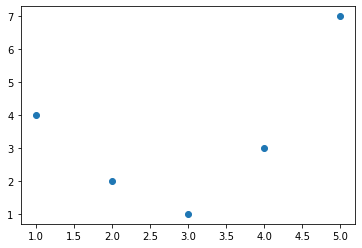

In [11]:
# this data clearly cannot be well described by a straight line
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x=np.array([1,2,3,4,5])
y=np.array([4,2,1,3,7])
plt.scatter(x,y)

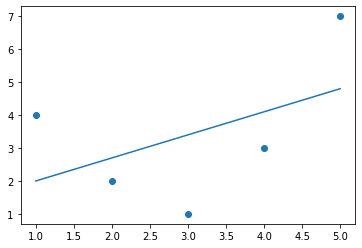

In [14]:
# Still, we can fit a line to the data using LinearRegression and get the optimal result
from sklearn.linear_model import LinearRegression
X=x[:, np.newaxis]
model=LinearRegression().fit(X,y)
yfit=model.predict(X)
plt.scatter(x,y)
plt.plot(x,yfit)

**It’s clear that we need a more sophisticated model to describe the relationship
between x and y. We can do this by transforming the data, adding extra columns of
features to drive more flexibility in the model. For example, we can add polynomial
features to the data this way:**

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3, include_bias=False)
x2=poly.fit_transform(X)
x2

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

The derived feature matrix has one column representing x, and a second column rep‐
resenting x2, and a third column representing x3. Computing a linear regression on
this expanded input gives a much closer fit to our data

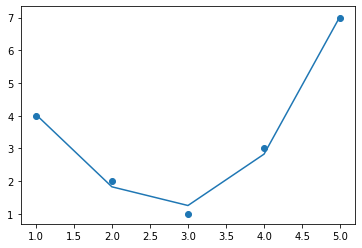

In [17]:
model=LinearRegression().fit(x2,y)
yfit=model.predict(x2)
plt.scatter(x,y)
plt.plot(x,yfit)

**This idea of improving a model not by changing the model, but by transforming the
inputs, is fundamental to many of the more powerful machine learning methods.**

## Imputation of Missing Data
Another common need in feature engineering is handling missing data. We discussed
the handling of missing data in DataFrames in “Handling Missing Data” , and saw that often the NaN value is used to mark missing values. For example, we
might have a dataset that looks like this:

In [18]:
from numpy import nan
X = np.array([[ nan, 0,3 ],
              [ 3,7,9 ],
              [ 3,5,2 ],
              [ 4,nan, 6 ],
              [ 8,8,1 ]])

y = np.array([14, 16, -1, 8, -5])

In [20]:
X, y

(array([[nan,  0.,  3.],
        [ 3.,  7.,  9.],
        [ 3.,  5.,  2.],
        [ 4., nan,  6.],
        [ 8.,  8.,  1.]]),
 array([14, 16, -1,  8, -5]))

When applying a typical machine learning model to such data, we will need to first replace such missing data with some appropriate fill value. This is known as **imputation of missing values**, and strategies range from simple **(e.g., replacing missing values with the mean of the column) to sophisticated (e.g., using matrix completion or a robust model to handle such data).**

The sophisticated approaches tend to be very application-specific, and we won’t dive
into them here. For a baseline imputation approach, using the mean, median, or most
frequent value, Scikit-Learn provides the Imputer class:

In [26]:
from numpy import nan
X = np.array([[ nan, 0,3 ],
              [ 3,7,9 ],
              [ 3,5,2 ],
              [ 4,nan, 6 ],
              [ 8,8,1 ]])

y = np.array([14, 16, -1, 8, -5])

We see that in the resulting data, the two missing values have been replaced with the
mean of the remaining values in the column. This imputed data can then be fed
directly into, for example, a LinearRegression estimator:

In [24]:
model=LinearRegression().fit(x2,y)
model.predict(x2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

## Feature Pipelines
With any of the preceding examples, it can quickly become tedious to do the transfor‐
mations by hand, especially if you wish to string together multiple steps. For example,
we might want a processing pipeline that looks something like this:
1. Impute missing values using the mean
2. Transform features to quadratic
3. Fit a linear regression

To streamline this type of processing pipeline, Scikit-Learn provides a pipeline object,
which can be used as follows:

In [27]:
from sklearn.impute import SimpleImputer # KNNImputer, IterativeImputer
imp=SimpleImputer(strategy='mean')
x2=imp.fit_transform(X)
x2


array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [28]:
from sklearn.pipeline import make_pipeline
model=make_pipeline(SimpleImputer(strategy='mean'),
                   PolynomialFeatures(degree=2),
                   LinearRegression())


In [30]:
model.fit(X,y) # X with missing values 
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


**All the steps of the model are applied automatically. Notice that for the simplicity of
this demonstration, we’ve applied the model to the data it was trained on; this is why
it was able to perfectly predict the resul**